In [1]:
# For python2/3 compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
# This module is for search filesystem with pattern matching
import glob

/data/bckim92/.virtualenvs/fira/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


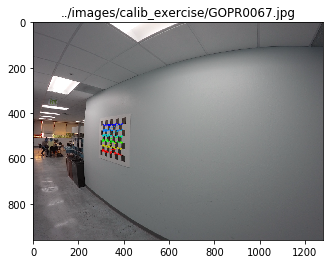

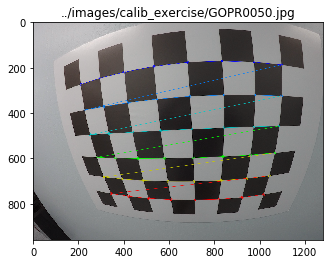

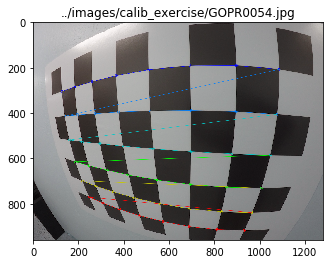

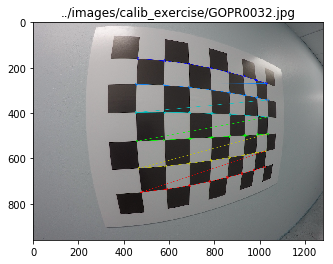

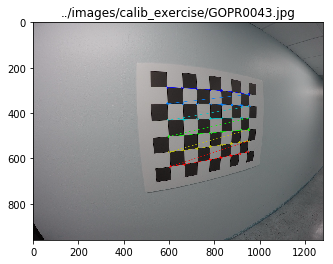

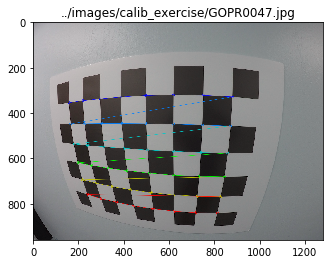

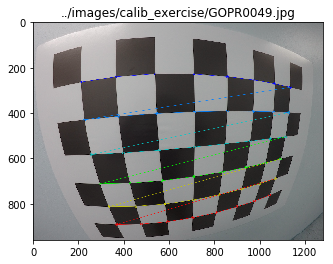

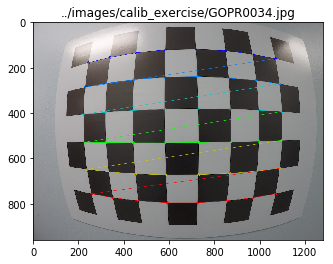

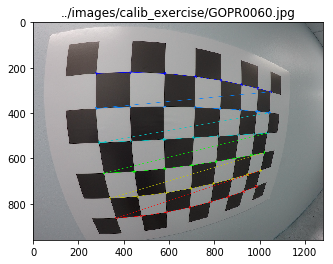

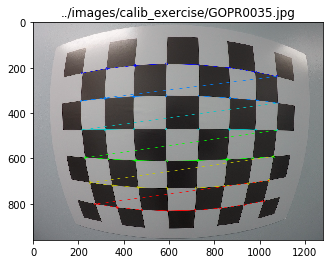

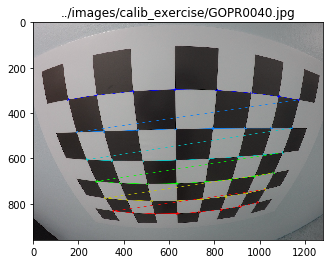

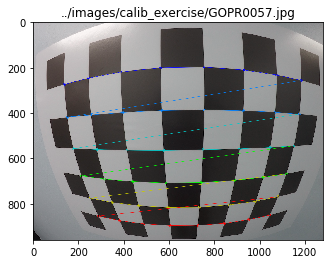

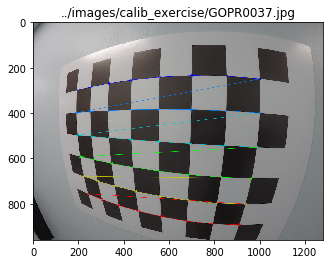

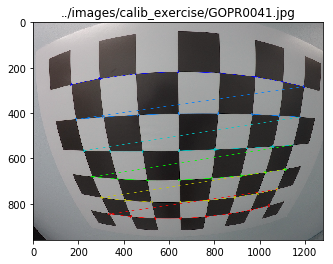

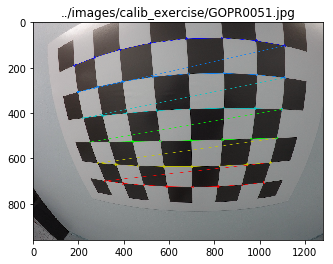

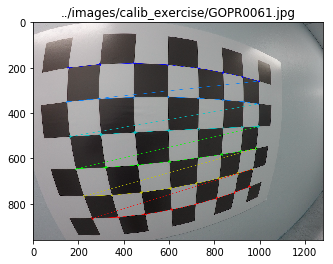

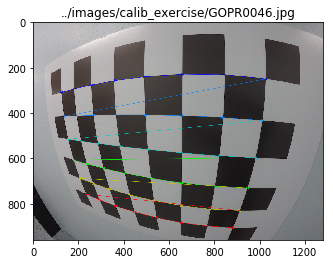

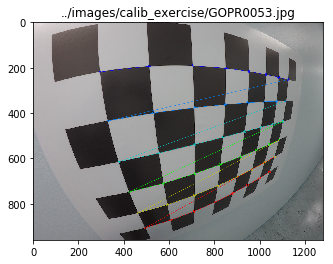

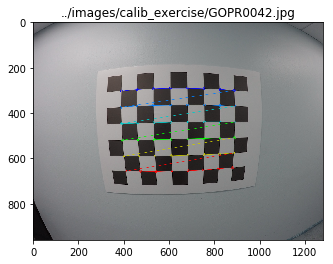

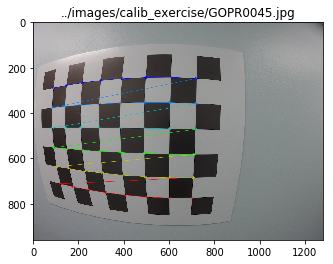

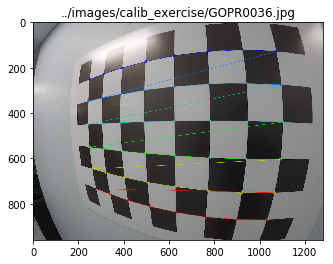

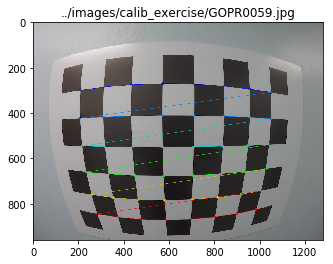

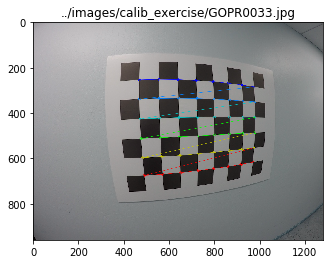

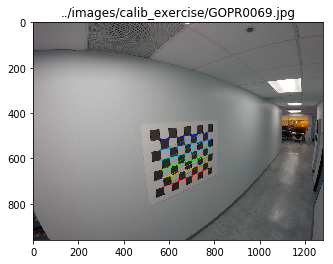

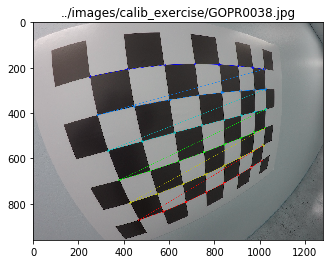

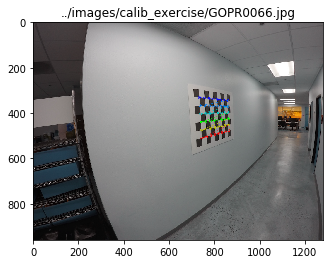

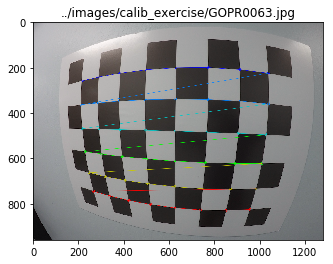

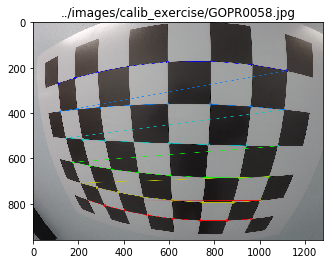

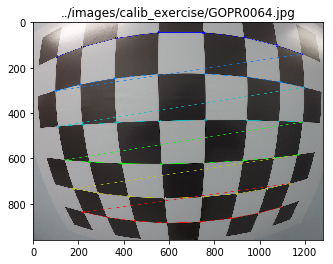

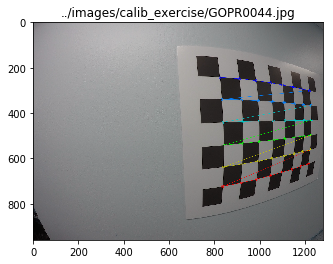

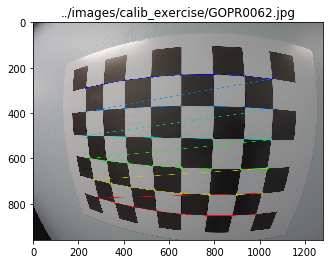

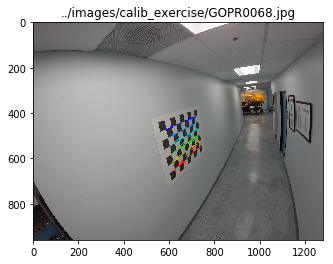

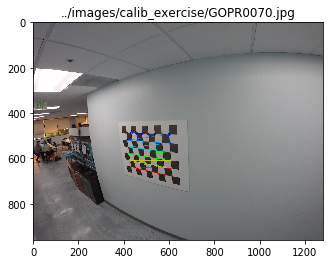

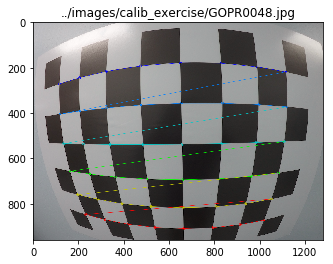

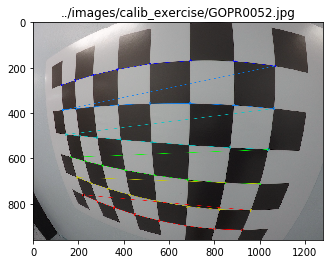

In [2]:
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('../images/calib_exercise/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        
        # Termination criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        
        # Refine corners
        cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners,ret)
        plt.figure()
        plt.title(fname)
        plt.imshow(img)

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

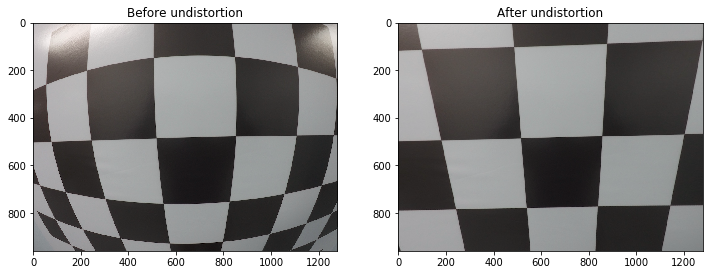

In [4]:
img = cv2.imread('../images/calib_test_image.jpg')
h,  w = img.shape[:2]

# undistort
dst = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before undistortion")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("After undistortion")
plt.imshow(dst)